In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [3]:
print("Keys of Iris Dataset: \n{}".format(iris_dataset.keys()))

Keys of Iris Dataset: 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [4]:
print("Target Names: \n{}".format(iris_dataset['target_names']))

Target Names: 
['setosa' 'versicolor' 'virginica']


In [5]:
print("Feature Names: \n{}".format(iris_dataset['feature_names']))

Feature Names: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [6]:
print("Type of Data: \n{}".format(type(iris_dataset['data'])))

Type of Data: 
<class 'numpy.ndarray'>


In [7]:
print("Shape of Data: \n{}".format(iris_dataset['data'].shape))

Shape of Data: 
(150, 4)


In [8]:
print("First 10 rows of data: \n{}".format(iris_dataset['data'][:10]))

First 10 rows of data: 
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


In [9]:
print("Type of Target: \n{}".format(type(iris_dataset['target'])))

Type of Target: 
<class 'numpy.ndarray'>


In [10]:
print("Shape of Target: \n{}".format(iris_dataset['target'].shape))

Shape of Target: 
(150,)


In [11]:
print("Target: \n{}".format(iris_dataset['target']))

Target: 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=0)
print("X_train shape: \n{}".format(X_train.shape))
print("X_test shape: \n{}".format(X_test.shape))
print("y_train shape: \n{}".format(y_train.shape))
print("y_test shape: \n{}".format(y_test.shape))

X_train shape: 
(112, 4)
X_test shape: 
(38, 4)
y_train shape: 
(112,)
y_test shape: 
(38,)


array([[<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal width (c

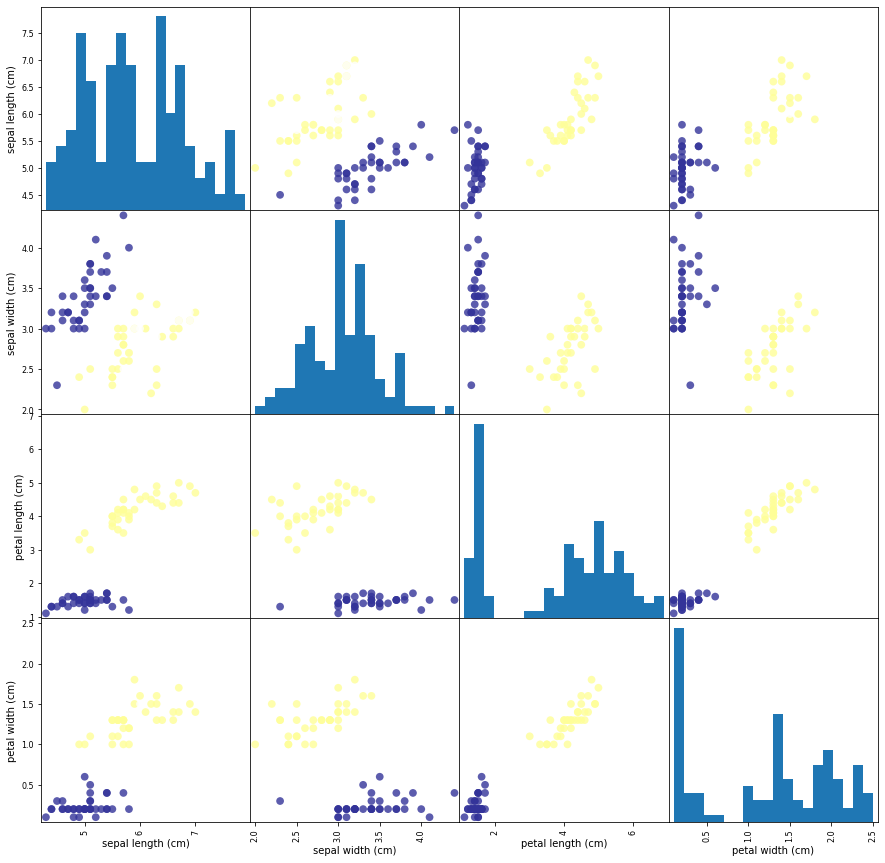

In [13]:
iris_df = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
pd.plotting.scatter_matrix(iris_df, c=y_train, figsize=(15,15), marker='o', hist_kwds={'bins': 20}, s=60, alpha=.8, cmap='terrain')


In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [15]:
X_new = np.array([[5.2,9,1,0.2]])
print("X_new shape: \n{}".format(X_new.shape))

X_new shape: 
(1, 4)


In [16]:
prediction = knn.predict(X_new)
print("Prediction \n{}".format(prediction))
print("Prediction Target Name: \n{}".format(iris_dataset['target_names'][prediction]))

Prediction 
[0]
Prediction Target Name: 
['setosa']


In [17]:
y_pred = knn.predict(X_test)
print("Predictions on Test Set: \n{}".format(y_pred))

Predictions on Test Set: 
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [18]:
print("Test Set Score: {:.2f}".format(np.mean(y_pred == y_test)))

Test Set Score: 0.97


In [19]:
print("Test Set Score: {:.2f}".format(knn.score(X_test, y_test)))

Test Set Score: 0.97


In [20]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


In [21]:
print("Classification Report: \n{}".format(classification_report(y_test, y_pred)))

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38

